In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import root_mean_squared_error, mean_absolute_error


operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

import extraction_squares

In [3]:
# import the most corrolated variables from the time series
vars_selected_40 = pd.read_csv('pre_processing/feature_selection/fs_corr_timeseries/corr_inst_max_40.csv')
vars_selected_40 = vars_selected_40['Unnamed: 0'].values

vars_selected_30 = pd.read_csv('pre_processing/feature_selection/fs_corr_timeseries/corr_inst_max_30.csv')
vars_selected_30 = vars_selected_30['Unnamed: 0'].values

vars_selected_20 = pd.read_csv('pre_processing/feature_selection/fs_corr_timeseries/corr_inst_max_20.csv')
vars_selected_20 = vars_selected_20['Unnamed: 0'].values

In [4]:
#stats = ['max', 'min', 'mean', 'std']
all_series = 'yes'

#for name_of_variable_levels in [vars_selected_40, vars_selected_30, vars_selected_20]:
def extract_timeseries(name_of_variable_levels, all_series='yes'): 
    # shape all_data as the timeseries data
    X_all_vars = {}

    for var in name_of_variable_levels:
        var, stat = var.rsplit("_", 1)
        if var == 'sea_surface_temperature':
            continue
        #for stat in stats:
        var_stat = f'{var}_{stat}'
        #if var_stat == f'instantaneous_10m_wind_gust_{stat}':
        #storm_data = []
        if all_series == 'yes':
            var_temp_non_eu = pd.read_csv(f'data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')
            # reverse the order of the columns
            var_temp_non_eu = var_temp_non_eu.iloc[:, ::-1]
            var_temp_eu = pd.read_csv(f'data/time_series_1h_EU/{var}/{var}_{stat}.csv')
            var_temp = pd.concat([var_temp_non_eu, var_temp_eu], axis=1)
        else:
            var_temp = pd.read_csv(f'data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')
        var_temp = var_temp.drop(columns=['Unnamed: 0', 'storm_index'])
        # select only the 12 first hours (represented by the 12 first columns)
        if all_series == 'no':
            var_temp = var_temp.iloc[:, :12]
        #var_temp_2 = var_temp.drop(columns=['storm_index'])
        var_temp_reshape = var_temp.to_numpy().reshape((var_temp.shape[0]*var_temp.shape[1]))
        X_all_vars[f'{var_stat}'] = var_temp_reshape

    # Assuming all_vars is populated as a dictionary
    df_X_all_vars = pd.DataFrame(X_all_vars)

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(df_X_all_vars)
    return df_X_all_vars, scaled_X

df_X_all_vars_40, scaled_X_40 = extract_timeseries(vars_selected_40)
df_X_all_vars_30, scaled_X_30 = extract_timeseries(vars_selected_30)
df_X_all_vars_20, scaled_X_20 = extract_timeseries(vars_selected_20)

y_all = {}

var = 'instantaneous_10m_wind_gust'
stat = 'max'
var_stat = f'{var}_{stat}'
if all_series == 'yes':
    var_temp_non_eu = pd.read_csv(f'data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')
    # reverse the order of the columns
    var_temp_non_eu = var_temp_non_eu.iloc[:, ::-1]
    var_temp_eu = pd.read_csv(f'data/time_series_1h_EU/{var}/{var}_{stat}.csv')
    var_temp = pd.concat([var_temp_non_eu, var_temp_eu], axis=1)
else:
    var_temp = pd.read_csv(f'data/time_series_1h_EU/{var}/{var}_{stat}.csv')
var_temp = var_temp.drop(columns=['Unnamed: 0', 'storm_index', 'storm_name','start_date'])
# select only the 12 first hours (represented by the 12 first columns)
if all_series == 'no':
    var_temp = var_temp.iloc[:, :12]
#var_temp_2 = var_temp.drop(columns=['storm_index'])
var_temp_reshape = var_temp.to_numpy().reshape((var_temp.shape[0]*var_temp.shape[1]))
y_all[f'{var_stat}'] = var_temp_reshape

df_y = pd.DataFrame(y_all)

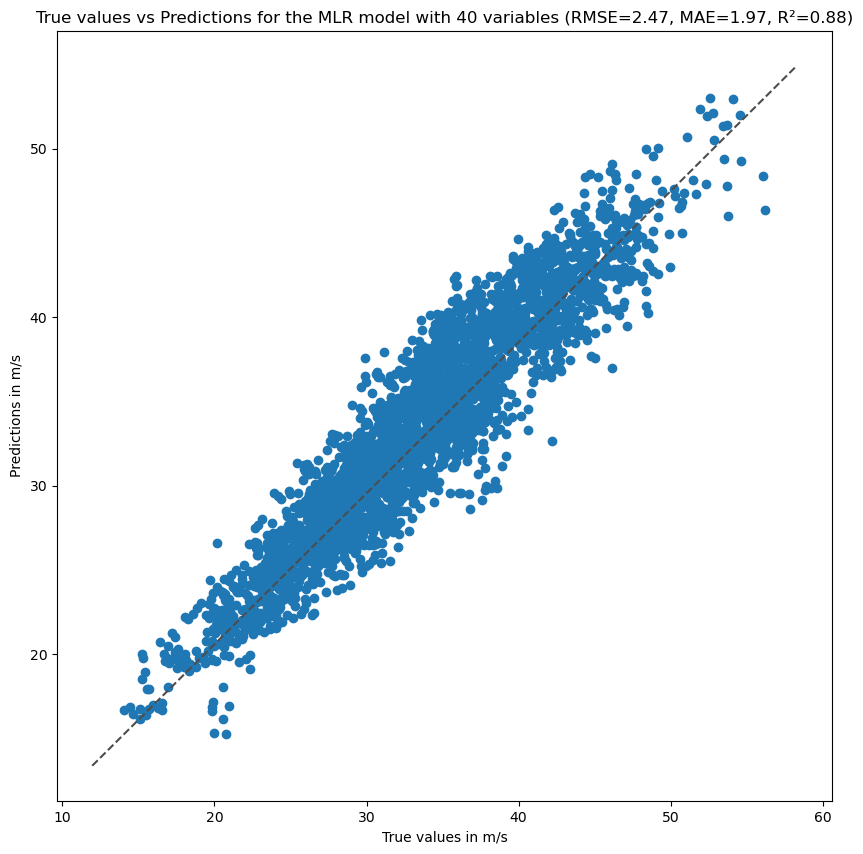

10m_u_component_of_wind_max: 2.479
mean_sea_level_pressure_std: 0.517
mean_sea_level_pressure_min: 2.420
10m_u_component_of_wind_std: 0.408
mean_sea_level_pressure_mean: -5.631
surface_pressure_mean: -2.431
geopotential_1000_min: 0.338
geopotential_500_mean: 0.338
mean_surface_latent_heat_flux_std: -976.074
surface_latent_heat_flux_std: 976.777
10m_v_component_of_wind_max: 1.163
surface_latent_heat_flux_min: -598.906
mean_surface_latent_heat_flux_min: 598.426
geopotential_500_max: -1.359
mean_sea_level_pressure_max: -6.933
surface_pressure_max: 2.006
geopotential_1000_std: 9.958
2m_dewpoint_temperature_std: 0.022
convective_precipitation_mean: -0.136
surface_latent_heat_flux_mean: -146.539
mean_surface_latent_heat_flux_mean: 145.970
geopotential_1000_max: -0.195
geopotential_500_min: -0.195
10m_u_component_of_wind_min: -0.085
mean_surface_sensible_heat_flux_std: -0.166
2m_temperature_std: -0.063
surface_pressure_min: -0.315
mean_surface_sensible_heat_flux_min: -0.153
10m_v_component_of

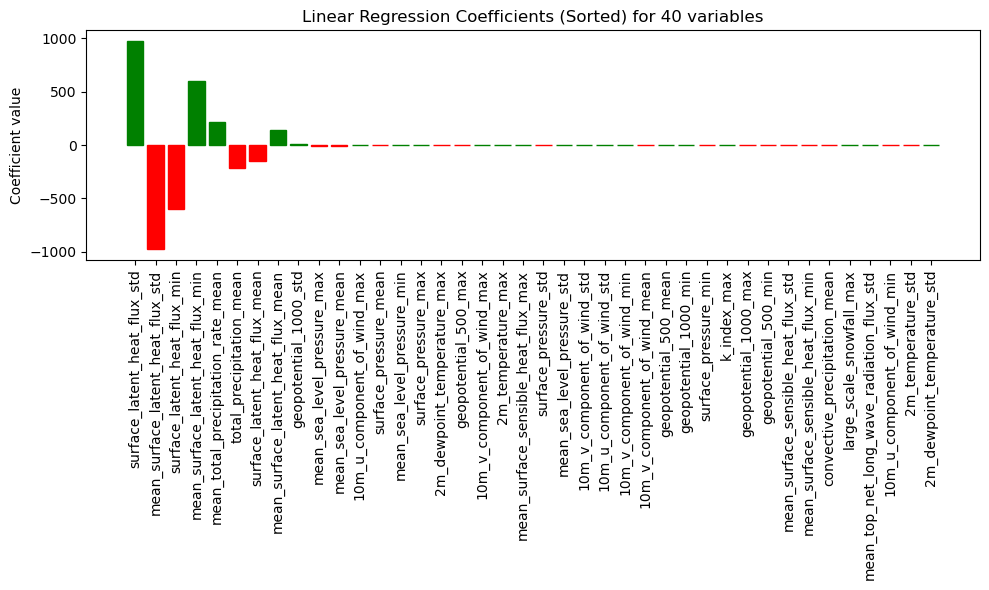

Features ranked by importance: ['surface_latent_heat_flux_std', 'mean_surface_latent_heat_flux_std', 'surface_latent_heat_flux_min', 'mean_surface_latent_heat_flux_min', 'mean_total_precipitation_rate_mean', 'total_precipitation_mean', 'surface_latent_heat_flux_mean', 'mean_surface_latent_heat_flux_mean', 'geopotential_1000_std', 'mean_sea_level_pressure_max', 'mean_sea_level_pressure_mean', '10m_u_component_of_wind_max', 'surface_pressure_mean', 'mean_sea_level_pressure_min', 'surface_pressure_max', '2m_dewpoint_temperature_max', 'geopotential_500_max', '10m_v_component_of_wind_max', '2m_temperature_max', 'mean_surface_sensible_heat_flux_max', 'surface_pressure_std', 'mean_sea_level_pressure_std', '10m_v_component_of_wind_std', '10m_u_component_of_wind_std', '10m_v_component_of_wind_min', '10m_v_component_of_wind_mean', 'geopotential_500_mean', 'geopotential_1000_min', 'surface_pressure_min', 'k_index_max', 'geopotential_1000_max', 'geopotential_500_min', 'mean_surface_sensible_heat_f

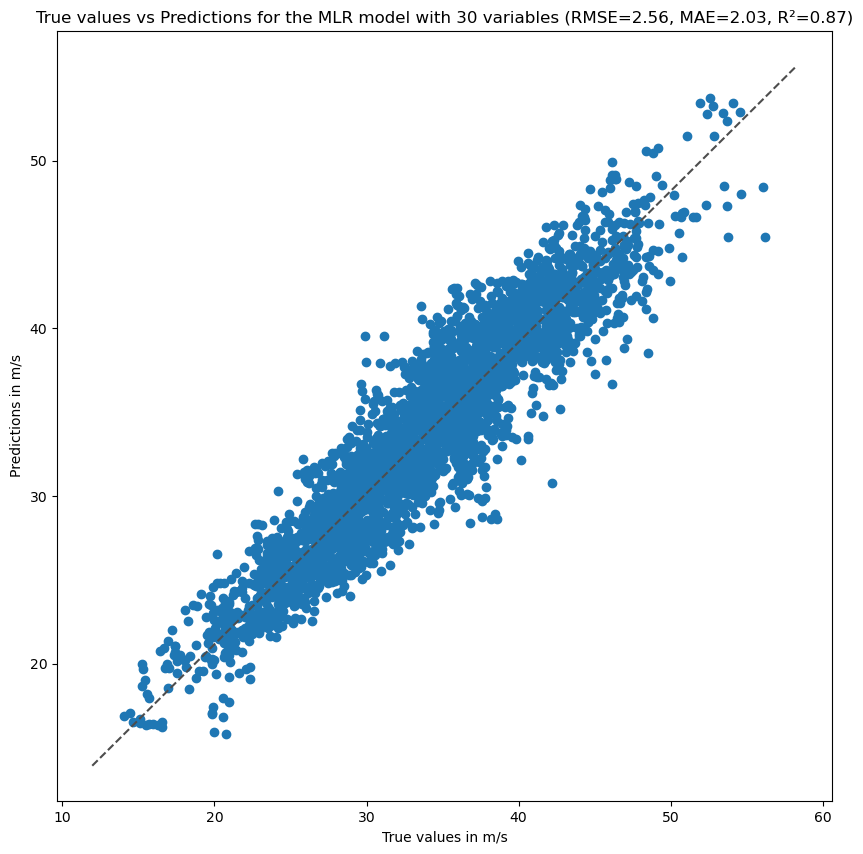

10m_u_component_of_wind_max: 2.445
mean_sea_level_pressure_std: 0.161
mean_sea_level_pressure_min: 2.217
10m_u_component_of_wind_std: 0.463
mean_sea_level_pressure_mean: -6.729
surface_pressure_mean: -1.909
geopotential_500_mean: 0.445
geopotential_1000_min: 0.445
mean_surface_latent_heat_flux_std: 1497.252
surface_latent_heat_flux_std: -1496.696
10m_v_component_of_wind_max: 1.914
surface_latent_heat_flux_min: -600.460
mean_surface_latent_heat_flux_min: 599.828
geopotential_500_max: -1.340
mean_sea_level_pressure_max: -7.208
surface_pressure_max: 1.513
geopotential_1000_std: 11.344
2m_dewpoint_temperature_std: -0.526
convective_precipitation_mean: 0.185
surface_latent_heat_flux_mean: -1459.837
mean_surface_latent_heat_flux_mean: 1459.630
geopotential_1000_max: -0.209
geopotential_500_min: -0.209
10m_u_component_of_wind_min: -0.224
mean_surface_sensible_heat_flux_std: 0.628
2m_temperature_std: 0.381
surface_pressure_min: -0.017
mean_surface_sensible_heat_flux_min: 0.263
10m_v_component_

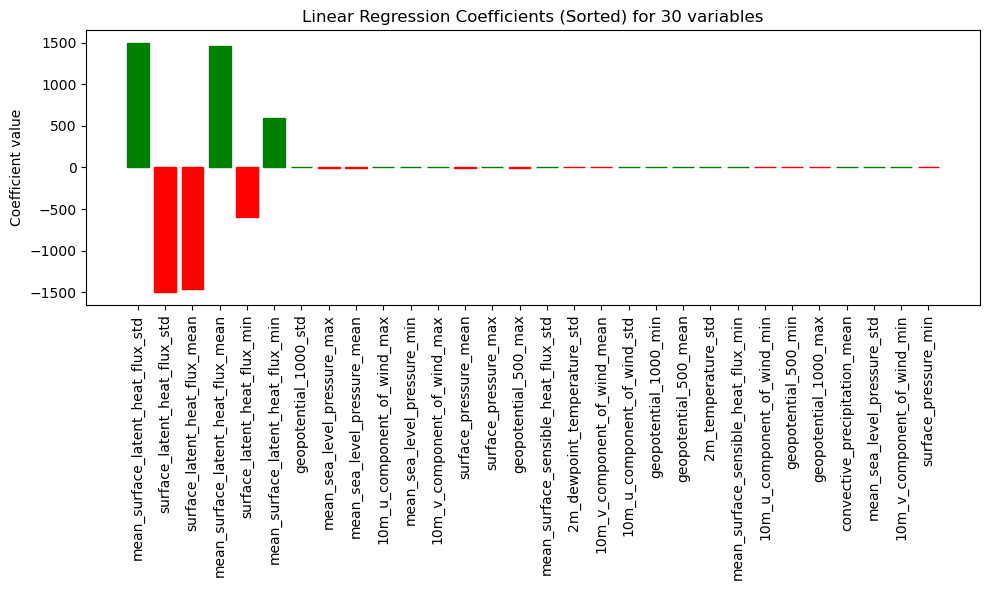

Features ranked by importance: ['mean_surface_latent_heat_flux_std', 'surface_latent_heat_flux_std', 'surface_latent_heat_flux_mean', 'mean_surface_latent_heat_flux_mean', 'surface_latent_heat_flux_min', 'mean_surface_latent_heat_flux_min', 'geopotential_1000_std', 'mean_sea_level_pressure_max', 'mean_sea_level_pressure_mean', '10m_u_component_of_wind_max', 'mean_sea_level_pressure_min', '10m_v_component_of_wind_max', 'surface_pressure_mean', 'surface_pressure_max', 'geopotential_500_max', 'mean_surface_sensible_heat_flux_std', '2m_dewpoint_temperature_std', '10m_v_component_of_wind_mean', '10m_u_component_of_wind_std', 'geopotential_1000_min', 'geopotential_500_mean', '2m_temperature_std', 'mean_surface_sensible_heat_flux_min', '10m_u_component_of_wind_min', 'geopotential_500_min', 'geopotential_1000_max', 'convective_precipitation_mean', 'mean_sea_level_pressure_std', '10m_v_component_of_wind_min', 'surface_pressure_min']


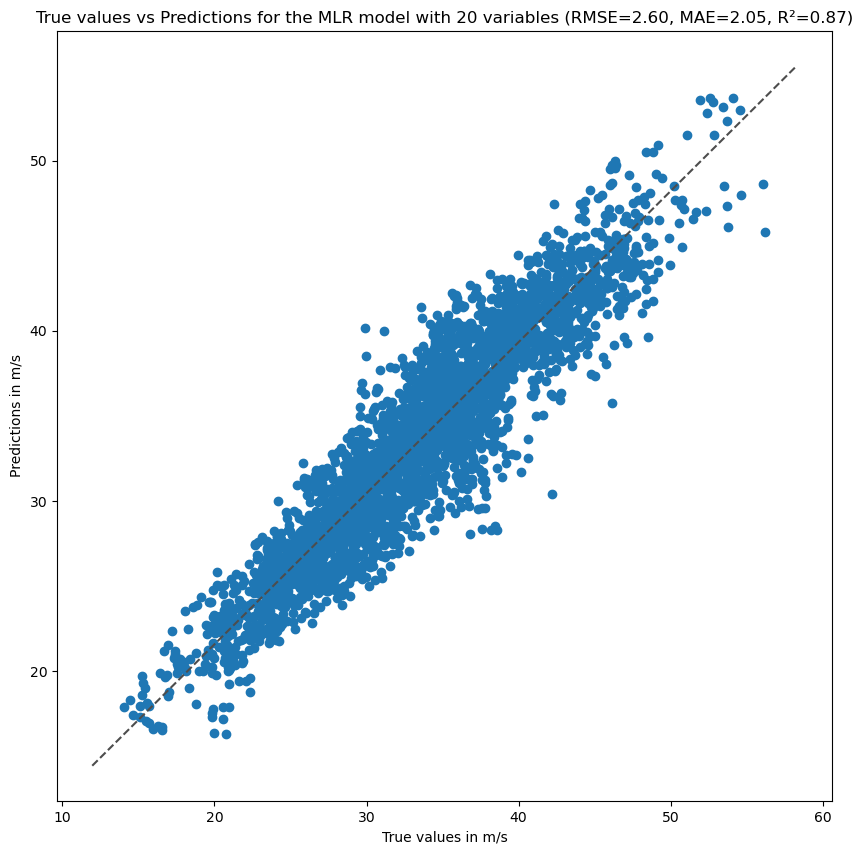

10m_u_component_of_wind_max: 2.328
mean_sea_level_pressure_std: -0.118
mean_sea_level_pressure_min: 1.251
10m_u_component_of_wind_std: 0.517
mean_sea_level_pressure_mean: -6.222
surface_pressure_mean: -2.258
geopotential_500_mean: 56709873323571.406
geopotential_1000_min: -56709873323571.148
mean_surface_latent_heat_flux_std: 2723.713
surface_latent_heat_flux_std: -2722.658
10m_v_component_of_wind_max: 1.735
surface_latent_heat_flux_min: -559.412
mean_surface_latent_heat_flux_min: 559.038
geopotential_500_max: -1.168
mean_sea_level_pressure_max: -5.604
surface_pressure_max: 1.125
geopotential_1000_std: 10.542
2m_dewpoint_temperature_std: 0.185
convective_precipitation_mean: 0.163
surface_latent_heat_flux_mean: -0.256


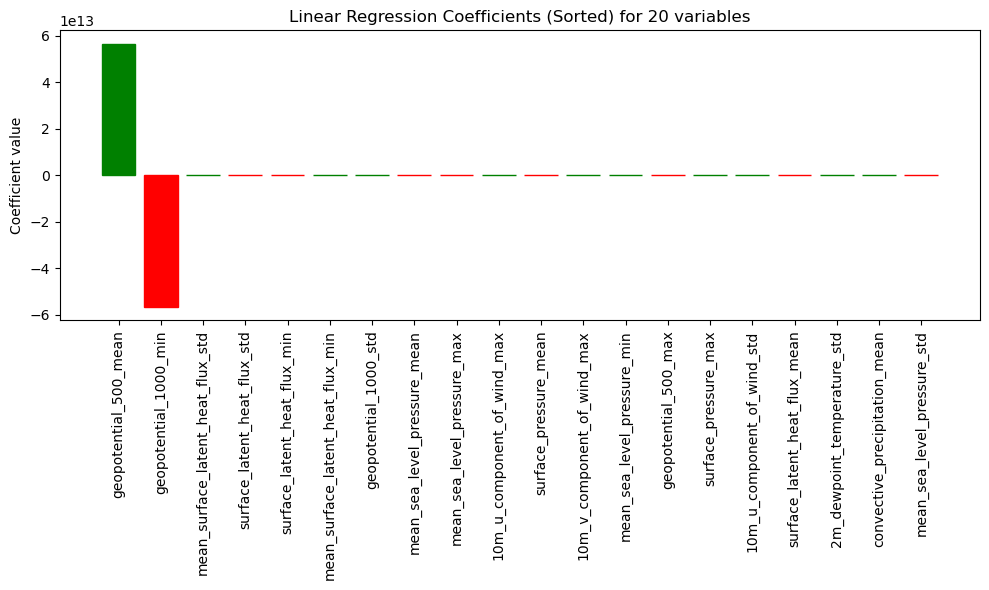

Features ranked by importance: ['geopotential_500_mean', 'geopotential_1000_min', 'mean_surface_latent_heat_flux_std', 'surface_latent_heat_flux_std', 'surface_latent_heat_flux_min', 'mean_surface_latent_heat_flux_min', 'geopotential_1000_std', 'mean_sea_level_pressure_mean', 'mean_sea_level_pressure_max', '10m_u_component_of_wind_max', 'surface_pressure_mean', '10m_v_component_of_wind_max', 'mean_sea_level_pressure_min', 'geopotential_500_max', 'surface_pressure_max', '10m_u_component_of_wind_std', 'surface_latent_heat_flux_mean', '2m_dewpoint_temperature_std', 'convective_precipitation_mean', 'mean_sea_level_pressure_std']


In [ ]:
def plot_corr(df_X_all_vars, scaled_X, df_y, size=10):   
    # fit the model
    n_vars = df_X_all_vars.shape[1]
    model = LinearRegression(n_jobs=-1)
    model.fit(scaled_X, df_y.to_numpy().ravel())

    # predictions
    y_pred = model.predict(scaled_X)

    # see the rmse and mae
    rmse = root_mean_squared_error(y_pred, df_y.to_numpy().ravel())
    mae = mean_absolute_error(y_pred, df_y.to_numpy().ravel())

        # Calculate R²
    y_mean = np.mean(df_y)
    ss_res = np.sum((df_y.to_numpy().ravel() - y_pred) ** 2)
    ss_tot = np.sum((df_y.to_numpy().ravel() - y_mean) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # plot the predictions
    plt.figure(figsize=(10, 10))
    plt.plot(df_y, y_pred, 'o')
    # plot the 45 degree line
    plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
    plt.xlabel('True values in m/s')
    plt.ylabel('Predictions in m/s')
    plt.title(f'True values vs Predictions for the MLR model with {n_vars} variables (RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.2f})')
    plt.show()

    # get the coefficients
    coefficients = model.coef_
    # Print feature names alongside coefficients
    feature_names = df_X_all_vars.columns
    for feature_name, coef in zip(feature_names, coefficients):
        print(f"{feature_name}: {coef:.3f}")

    # Sort by absolute value
    sorted_indices = np.argsort(np.abs(coefficients))[::-1]  # descending order
    sorted_coefs = coefficients[sorted_indices]
    sorted_names = feature_names[sorted_indices]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_names, sorted_coefs)

    # You can also color-code bars by sign if you want:
    for bar, coef in zip(bars, sorted_coefs):
        bar.set_color('g' if coef >= 0 else 'r')
    #plt.bar(sorted_names, sorted_coefs)
    plt.xticks(rotation=90)
    plt.ylabel('Coefficient value')
    plt.title(f'Linear Regression Coefficients (Sorted) for {n_vars} variables')
    plt.tight_layout()
    plt.show()

    coefs_abs = np.abs(coefficients)
    ranked_features = [feature for _, feature in sorted(zip(coefs_abs, feature_names), reverse=True)]
    print("Features ranked by importance:", ranked_features)

    return model, rmse, mae

model_40, rmse_40, mae_40 = plot_corr(df_X_all_vars_40, scaled_X_40, df_y)
model_30, rmse_30, mae_30 = plot_corr(df_X_all_vars_30, scaled_X_30, df_y)
model_20, rmse_20, mae_20 = plot_corr(df_X_all_vars_20, scaled_X_20, df_y)

In [ ]:
def feature_selection(df_X_all_vars, scaled_X, df_y, model):
    # Initialize the sequential feature selector
    sfs = SequentialFeatureSelector(
                                    model,  # Use the same model as before
                                    n_features_to_select=5,  # Select 5 features
                                    direction='forward',  # Forward selection
                                    n_jobs=-1  # Use all available cores
                                    )   

    # Fit the selector
    sfs.fit(scaled_X, df_y.to_numpy().ravel())

    # Get the selected feature indices
    selected_indices = sfs.get_support(indices=True)

    # Get the names of the selected features
    selected_features = df_X_all_vars.columns[selected_indices]
    print("Selected features:", selected_features)
    return selected_features

selected_features_40 = feature_selection(df_X_all_vars_40, scaled_X_40, model_40)
selected_features_30 = feature_selection(df_X_all_vars_30, scaled_X_30, model_30)
selected_features_20 = feature_selection(df_X_all_vars_20, scaled_X_20, model_20)

Selected features: Index(['10m_u_component_of_wind_max', 'surface_pressure_mean',
       'mean_surface_latent_heat_flux_std', '10m_v_component_of_wind_max',
       'surface_pressure_max'],
      dtype='object')
Selected features: Index(['10m_u_component_of_wind_max', 'surface_pressure_mean',
       'mean_surface_latent_heat_flux_std', '10m_v_component_of_wind_max',
       'surface_pressure_max'],
      dtype='object')
Selected features: Index(['10m_u_component_of_wind_max', 'surface_pressure_mean',
       'mean_surface_latent_heat_flux_std', '10m_v_component_of_wind_max',
       'surface_pressure_max'],
      dtype='object')
